# Contents

## 1. Import libraries & data

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import plotly.io as pio 
from plotly.offline import init_notebook_mode, iplot
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
from textblob import TextBlob 
import kaleido as kal

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/'

In [7]:
df = pd.read_csv(os.path.join(path, 'gun_violence_data_wrangled.csv'))

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_12979/2512493489.py:1: DtypeWarning:

Columns (0,22,23) have mixed types. Specify dtype option on import or set low_memory=False.



## 2. Clean data

In [8]:
# Set display option to show all columns without truncation
pd.set_option('display.max_columns', None)

In [9]:
df.head(30)

incident_id        date                 state    city_or_county  \
0       461105  2013-01-01          Pennsylvania        Mckeesport   
1       460726  2013-01-01            California         Hawthorne   
2       478855  2013-01-01                  Ohio            Lorain   
3       478925  2013-01-05              Colorado            Aurora   
4       478959  2013-01-07        North Carolina        Greensboro   
5       478948  2013-01-07              Oklahoma             Tulsa   
6       479363  2013-01-19            New Mexico       Albuquerque   
7       479374  2013-01-21             Louisiana       New Orleans   
8       479389  2013-01-21            California         Brentwood   
9       492151  2013-01-23              Maryland         Baltimore   
10      491674  2013-01-23             Tennessee       Chattanooga   
11      479413  2013-01-25              Missouri       Saint Louis   
12      479561  2013-01-26             Louisiana         Charenton   
13      479554  2013-01-26  District of Columbia        Washington   
14      479460  2013-01-26                  Ohio       Springfield   
15      479573  2013-02-02             Tennessee           Memphis   
16      479580  2013-02-03            California     Yuba (county)   
17      479592  2013-02-07              Illinois           Chicago   
18      479603  2013-02-09             Louisiana       New Orleans   
19      480311  2013-02-11            California           Vallejo   
20      480327  2013-02-11              Delaware        Wilmington   
21      480344  2013-02-12                  Utah           Midvale   
22      480358  2013-02-19            California   Orange (county)   
23      480383  2013-02-21              Oklahoma             Tulsa   
24      480401  2013-02-22              Michigan      Grand Rapids   
25      480407  2013-02-23            California         Lancaster   
26      480443  2013-02-24               Georgia             Macon   
27      481186  2013-03-02             Louisiana        Shreveport   
28      481198  2013-03-03               Georgia          Moultrie   
29      481208  2013-03-03              Michigan  Saginaw (county)   

                                              address  n_killed  n_injured  \
0           1506 Versailles Avenue and Coursin Street         0          4   
1                        13500 block of Cerise Avenue         1          3   
2                               1776 East 28th Street         1          3   
3                    16000 block of East Ithaca Place         4          0   
4                           307 Mourning Dove Terrace         2          2   
5                          6000 block of South Owasso         4          0   
6                                      2806 Long Lane         5          0   
7   LaSalle Street and Martin Luther King Jr. Boul...         0          5   
8                          1100 block of Breton Drive         0          4   
9                        1500 block of W. Fayette St.         1          6   
10                                     1501 Dodds Ave         1          3   
11                W Florissant Ave and Riverview Blvd         1          3   
12                       1000 block of Flat Town Road         2          3   
13                        2403 Benning Road Northeast         0          5   
14                               601 West Main Street         1          3   
15                                  2514 Mount Moriah         0          5   
16                        5800 block of Poplar Avenue         1          3   
17                     2500 block of East 75th Street         0          4   
18                        400 block of Bourbon Street         0          4   
19                       800 block of Humboldt Street         1          4   
20                              500 North King Street         3          2   
21              8286 Adams Street and 450 West Street         4          1   
22                                    

Majority of cleaning and wrangling procedures have been conducted in previous tasks

In [10]:
df.dtypes

incident_id                  object
date                         object
state                        object
city_or_county               object
address                      object
n_killed                      int64
n_injured                     int64
congressional_district        int64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
latitude                    float64
location_description         object
longitude                   float64
n_guns_involved             float64
notes                        object
participant_age              object
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
sources                      object
state_house_district         object
state_senate_district        object
year                          int64
month                         int64
monthday                      int64
weekday                     

In [11]:
# Convert NaN values to 0 in 'congressional_district'
df['congressional_district'] = df['congressional_district'].fillna(0)

In [12]:

# Convert '-' values to 0 in a specific column
df['congressional_district'] = df['congressional_district'].replace('-', 0)

In [13]:
# Convert 'congressional_district' to integers
df['congressional_district'] = df['congressional_district'].apply(lambda x: int(float(x)))

In [14]:
# Convert string into dictionary
def StringToDic(S1):
    dic1 = {}
    list1 = str(S1).split('||')
    for i in list1:
        try:
            index = i.split('::')[0]
            value = i.split('::')[1]
            dic1[index] = value
        except:
            pass
        
    return dic1
        
    
# Apply the function above to each column, creating new column
df['participant_age_dic'] \
= df['participant_age'].apply(lambda x: StringToDic(x))

df['participant_type_dic'] \
= df['participant_type'].apply(lambda x: StringToDic(x)) 

df['participant_gender_dic'] \
= df['participant_gender'].apply(lambda x: StringToDic(x)) 


# Create another two new column, with new dictionary mapping type and age, type and gender
mappingCol1='participant_type_dic'
def MapThroughRow(df,mappingCol1,mappingCol2):
    newDic = {'Victim':[],'Subject-Suspect':[]}
    for rowName,row in df.iterrows():
        for keys,values in row[mappingCol1].items():
            if (keys in row[mappingCol2]) and (values =='Victim'):
                newDic['Victim'].append(row[mappingCol2][keys])
            elif (keys in row[mappingCol2]) and ('Subject-Suspect' in values):
                newDic['Subject-Suspect'].append(row[mappingCol2][keys])
                
    return newDic

In [15]:
df

incident_id        date           state city_or_county  \
0           461105  2013-01-01    Pennsylvania     Mckeesport   
1           460726  2013-01-01      California      Hawthorne   
2           478855  2013-01-01            Ohio         Lorain   
3           478925  2013-01-05        Colorado         Aurora   
4           478959  2013-01-07  North Carolina     Greensboro   
...            ...         ...             ...            ...   
239673     1083139  2018-03-31       Louisiana   Natchitoches   
239674     1083151  2018-03-31       Louisiana         Gretna   
239675     1082514  2018-03-31           Texas        Houston   
239676     1081940  2018-03-31           Maine   Norridgewock   
239677      sban_1  2017-10-01          Nevada      Las Vegas   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 block of Cerise Avenue         1          3   
2                           1776 East 28th Street         1          3   
3                16000 block of East Ithaca Place         4          0   
4                       307 Mourning Dove Terrace         2          2   
...                                           ...       ...        ...   
239673                             247 Keyser Ave         1          0   
239674                  1300 block of Cook Street         0          1   
239675                     12630 Ashford Point Dr         1          0   
239676                           434 Skowhegan Rd         2          0   
239677                   Mandalay Bay 3950 Blvd S        59        489   

        congressional_district              gun_stolen  \
0                           14                     NaN   
1                           43                     NaN   
2                            9  0::Unknown||1::Unknown   
3                            6                     NaN   
4                            6  0::Unknown||1::Unknown   
...                        ...                     ...   
239673                       4              0::Unknown   
239674                       2              0::Unknown   
239675                       9              0::Unknown   
239676                       2  0::Unknown||1::Unknown   
239677                       0                       -   

                      gun_type  \
0                          NaN   
1                          NaN   
2       0::Unknown||1::Unknown   
3                          NaN   
4       0::Handgun||1::Handgun   
...                        ...   
239673              0::Unknown   
239674              0::Unknown   
239675              0::Unknown   
239676  0::Handgun||1::Shotgun   
239677                       -   

                                 incident_characteristics  latitude  \
0       Shot - Wounded/Injured||Mass Shooting (4+ vict...   40.3467   
1       Shot - Wounded/Injured||Shot - Dead (murder, a...   33.9090   
2       Shot - Wounded/Injured||Shot - Dead (murder, a...   41.4455   
3       Shot - Dead (murder, accidental, suicide)||Off...   39.6518   
4       Shot - Wounded/Injured||Shot - Dead (murder, a...   36.1140   
...                                                   ...       ...   
239673  Shot - Dead (murder, accidental, suicide)||Ins...   31.7537   
239674                             Shot - Wounded/Injured   29.9239   
239675          Shot - Dead (murder, accidental, suicide)   29.7201   
239676  Shot - Dead (murder, accidental, suicide)||Sui...   44.7293   
239677                                                  -   36.0950   

               location_description   longitude  n_guns_involved  \
0                               NaN  -79.855900              NaN   
1                               NaN -118.333000              NaN   
2                       Cotton Club  -82.137700              2.0   
3                               NaN -104.802000              NaN   
4                               NaN  -

In [16]:
#export data
df.to_csv('gun_violence_data_wrangled2.csv', index=False)

In [17]:
#create frequency distribution
def countDic(L):
    dic = {}
    for i in L:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
    return dic

In [18]:
mappingCol2 = 'participant_age_dic'
mappingCol3 = 'participant_gender_dic'
MapTypeAge = MapThroughRow(df,mappingCol1,mappingCol2)
for key,values in MapTypeAge.items():
    MapTypeAge[key] = [int(i) for i in values]
    
MapTypeGender = MapThroughRow(df,mappingCol1,mappingCol3)

In [19]:
VicageList = list(countDic(MapTypeAge['Victim']).keys())
VicageCount = list(countDic(MapTypeAge['Victim']).values())
SusageList = list(countDic(MapTypeAge['Subject-Suspect']).keys())
SusageCount = list(countDic(MapTypeAge['Subject-Suspect']).values())

## 4. Explore data visually

Explore relationship on number killed and location

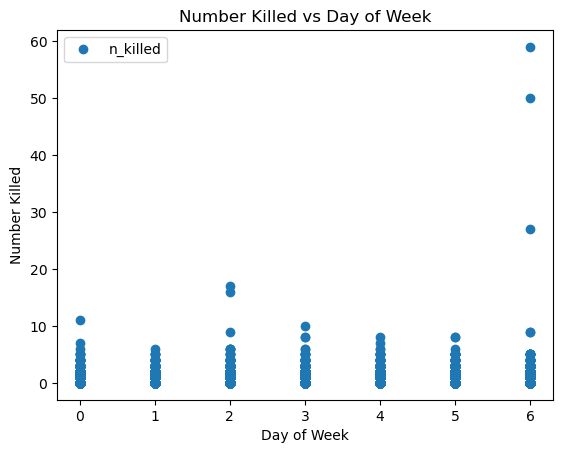

In [20]:
# Create a scatterplot using matplotlib 

df.plot(x = 'weekday', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number Killed vs Day of Week')  
plt.xlabel('Day of Week')  
plt.ylabel('Number Killed')  
plt.show()

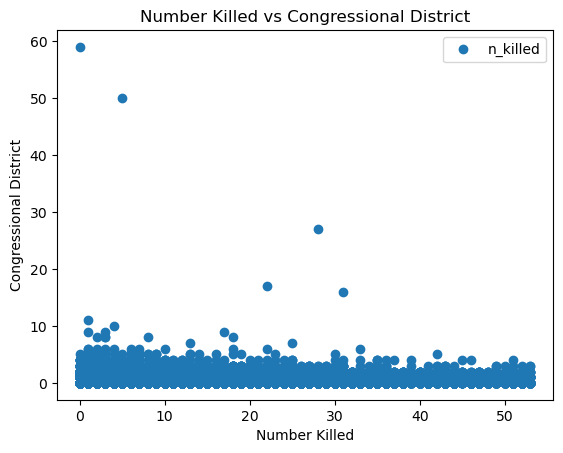

In [21]:
# Create a scatterplot using matplotlib 

df.plot(x = 'congressional_district', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number Killed vs Congressional District')  
plt.xlabel('Number Killed')  
plt.ylabel('Congressional District')  
plt.show()

date and n_killed 

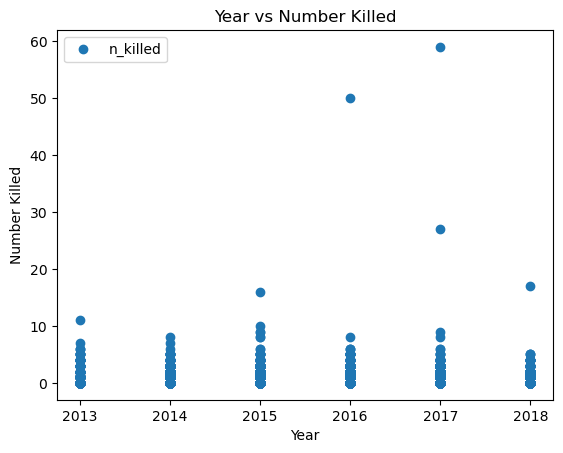

In [22]:
# Create a scatterplot using matplotlib 

df.plot(x = 'year', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs Number Killed')  
plt.xlabel('Year')  
plt.ylabel('Number Killed')  
plt.show()

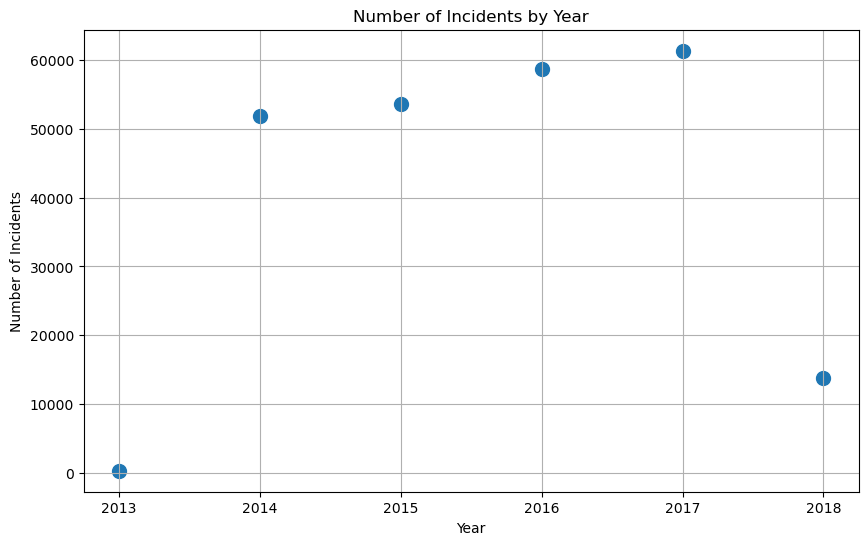

In [23]:
# Group data by year and count the number of incidents
incident_count_by_year = df['year'].value_counts().sort_index()

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(incident_count_by_year.index, incident_count_by_year.values, marker='o', s=100)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Year')
plt.grid(True)

# Show the scatterplot
plt.show()

In [24]:
#return the top 10 most impactful incidents
df.\
        loc[:,['date','year','state', 'city_or_county', 'address', 'total', 'participant_age', 'participant_type']].\
        sort_values(by='total', ascending = False).\
        head(10)

date  year       state            city_or_county  \
239677  2017-10-01  2017      Nevada                 Las Vegas   
130448  2016-06-12  2016     Florida                   Orlando   
217151  2017-11-05  2017       Texas        Sutherland Springs   
101531  2015-12-02  2015  California            San Bernardino   
232745  2018-02-14  2018     Florida  Pompano Beach (Parkland)   
70511   2015-05-17  2015       Texas                      Waco   
195845  2017-07-01  2017    Arkansas               Little Rock   
137328  2016-07-25  2016     Florida                Fort Myers   
11566   2014-04-02  2014       Texas                 Fort Hood   
92624   2015-10-01  2015      Oregon                  Roseburg   

                                             address  total  \
239677                      Mandalay Bay 3950 Blvd S    548   
130448                          1912 S Orange Avenue    103   
217151                                    216 4th St     47   
101531                    1365 South Waterman Avenue     35   
232745                           5901 Pine Island Rd     34   
70511                        4671 S Jack Kultgen Fwy     27   
195845                                  220 W 6th St     25   
137328                                3580 Evans Ave     21   
11566   Motor Pool Road and Tank Destroyer Boulevard     20   
92624                         1140 Umpqua College Rd     19   

                                          participant_age  \
239677                                                  -   
130448  0::34||1::23||2::20||3::22||4::36||5::22||6::2...   
217151  0::14||1::7||2::5||3::30||4::58||5::60||6::36|...   
101531  0::42||1::58||2::52||3::37||4::40||5::27||6::4...   
232745  0::35||1::14||2::17||3::37||4::14||5::15||6::4...   
70511   0::31||1::65||2::46||3::44||4::43||5::39||6::4...   
195845  0::16||1::25||2::21||3::19||4::23||5::25||6::3...   
137328  0::14||1::18||2::12||3::14||4::19||5::23||6::1...   
11566                         0::39||1::37||2::38||19::34   
92624   0::19||1::18||2::59||3::18||4::33||5::67||6::4...   

                                         participant_type  
239677                                                  -  
130448  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
217151  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
101531  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
232745  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
70511   0::Victim||1::Victim||2::Victim||3::Victim||4:...  
195845  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
137328  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
11566   0::Victim||1::Victim||2::Victim||3::Victim||4:...  
92624   0::Victim||1::Victim||2::Victim||3::Victim||4:...

In [25]:
# For Suspects
trace1 = go.Bar(
    x=SusageList,
    y=SusageCount,
    name='Age distribution of Suspects',
    marker=dict(
        color='red'
    )
)


data = [trace1]
layout = go.Layout(
    title='Age Distribution of Suspects',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)',
        ),
        range=[0,100]
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


# Specify the filename and format
filename = 'suspect_age_distribution.jpg'

# Use the `write_image` function to save the plot as an image
pio.write_image(fig, filename, format='jpeg', width=800, height=600)

In [26]:
# For Victim
trace1 = go.Bar(
    x=VicageList,
    y=VicageCount,
    name='Age distribution of Victim',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)


data = [trace1]
layout = go.Layout(
    title='Age Distribution of Victims',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)',
        ),
        range=[0,100]
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [27]:
# Specify the filename and format
filename = 'victim_age_distribution.jpg'

# Use the `write_image` function to save the plot as an image
pio.write_image(fig, filename, format='jpeg', width=800, height=600)

Month vs. Total 

In [28]:
df.head()

incident_id        date           state city_or_county  \
0      461105  2013-01-01    Pennsylvania     Mckeesport   
1      460726  2013-01-01      California      Hawthorne   
2      478855  2013-01-01            Ohio         Lorain   
3      478925  2013-01-05        Colorado         Aurora   
4      478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

   congressional_district              gun_stolen                gun_type  \
0                      14                     NaN                     NaN   
1                      43                     NaN                     NaN   
2                       9  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
3                       6                     NaN                     NaN   
4                       6  0::Unknown||1::Unknown  0::Handgun||1::Handgun   

                            incident_characteristics  latitude  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...   40.3467   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...   33.9090   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...   41.4455   
3  Shot - Dead (murder, accidental, suicide)||Off...   39.6518   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...   36.1140   

  location_description  longitude  n_guns_involved  \
0                  NaN   -79.8559              NaN   
1                  NaN  -118.3330              NaN   
2          Cotton Club   -82.1377              2.0   
3                  NaN  -104.8020              NaN   
4                  NaN   -79.9569              2.0   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                                NaN   
3                                                NaN   
4  Two firearms recovered. (Attempted) murder sui...   

                     participant_age  \
0                              0::20   
1                              0::20   
2  0::25||1::31||2::33||3::34||4::33   
3         0::29||1::33||2::56||3::33   
4         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN 

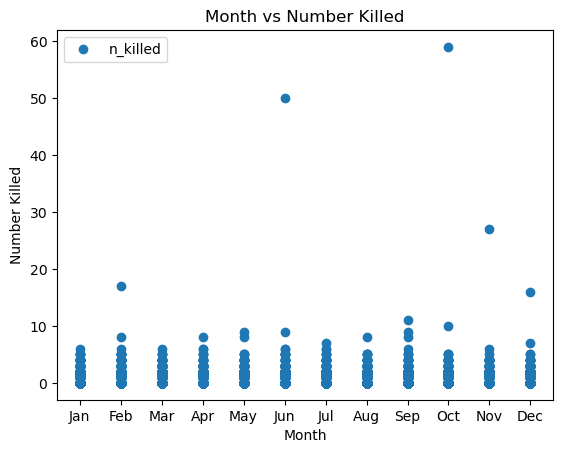

In [29]:
# Create a scatterplot using matplotlib 

df.plot(x = 'month', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Month vs Number Killed')  
plt.xlabel('Month')  
plt.ylabel('Number Killed')  

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)  # Set tick positions and labels for all 12 months

plt.show()

Month vs. Total 

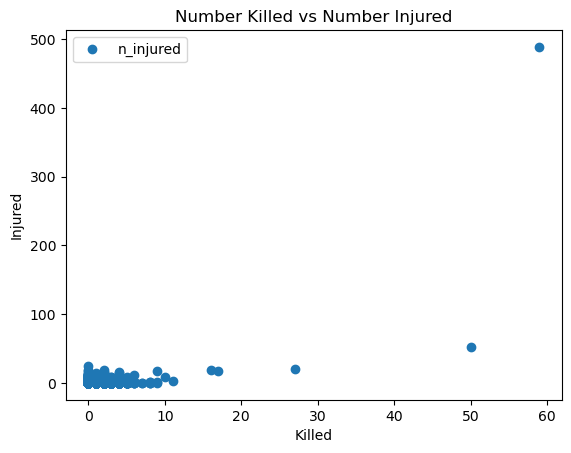

In [30]:
# Create a scatterplot using matplotlib 

df.plot(x = 'n_killed', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number Killed vs Number Injured')  
plt.xlabel('Killed')  
plt.ylabel('Injured')  

plt.show()

## 5. State hypothesis

There is a positive correlation between the number of people killed and the number of people injured in an incident. 

## 6. Reshape variables into NumPy arrays (X: independent var y: dependent var)

In [31]:
X=df['n_killed'].values.reshape(-1,1)
y=df['n_injured'].values.reshape(-1,1)

## 7. Split data into training and test set

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Run linear regression on data

In [33]:
#create a regression object 
regression = LinearRegression() # This is the regression object, which will be fit onto the training set.

In [34]:
#fit model to training set
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
#create prediction for y on the test set
y_predicted = regression.predict(X_test)

## 9. Create a plot that shows the regression line on the test set

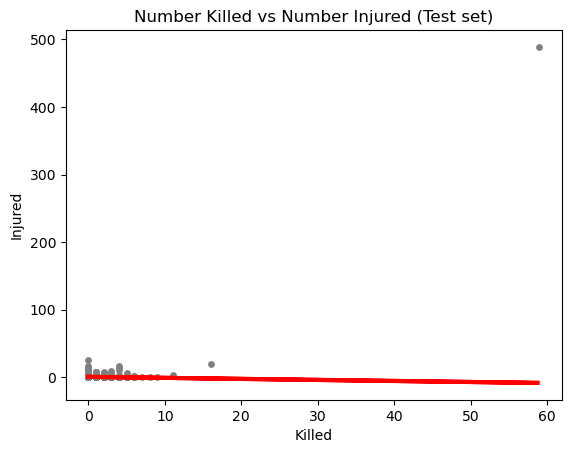

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number Killed vs Number Injured (Test set)')
plot_test.xlabel('Killed')
plot_test.ylabel('Injured')
plot_test.show()

Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The negative slope of approximately -0.1531 suggests a negative relationship between the independent variable (X) and the dependent variable (Y). This means that as the value of X increases, the model predicts that the value of Y will tend to decrease. However, the slope is not very steep, indicating a relatively weak relationship between the variables.

## 10. Check the model performance statistics—MSE and R2 score.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.15307157]]
Mean squared error:  3.9600809457126
R2 score:  -0.02882439715311591


## 11. Compare the predicted y values with the actual y values in a dataframe

Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        0   0.532756
1        0   0.532756
2        0   0.532756
3        0   0.532756
4        1   0.532756
5        1   0.532756
6        0   0.532756
7        1   0.532756
8        0   0.379685
9        0   0.532756
10       0   0.532756
11       0   0.532756
12       0   0.532756
13       0   0.532756
14       2   0.379685
15       0   0.532756
16       1   0.532756
17       0   0.379685
18       0   0.532756
19       0   0.379685
20       1   0.532756
21       1   0.532756
22       0   0.379685
23       1   0.532756
24       1   0.532756
25       1   0.379685
26       0   0.532756
27       1   0.532756
28       0   0.379685
29       0   0.532756

Overall, the model's performance is not satisfactory. The negative R2 score and relatively high MSE indicate that the model's predictions do not align well with the actual data. 

There may have been sampling or collection bias in the data. 

In [40]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


In [41]:
from PIL import Image

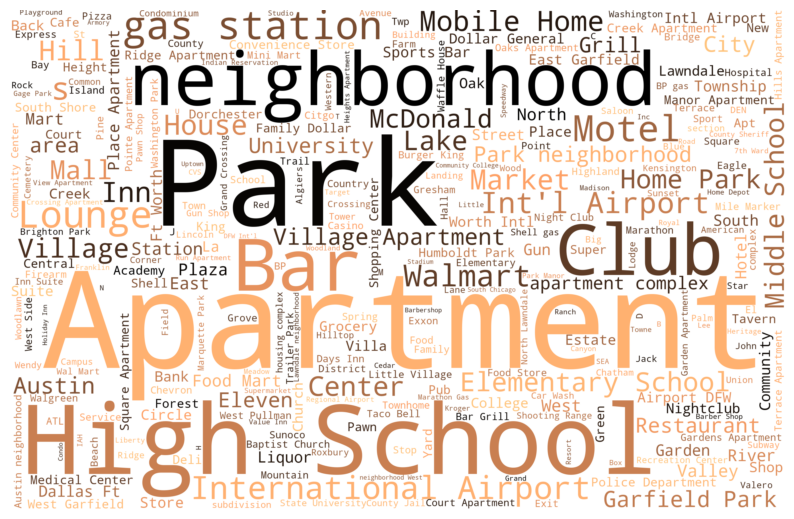

In [42]:
mask = np.array(Image.open('/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/gun.png'))
# Join text data from the 'location_description' column
txt = " ".join(df['location_description'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    mask=mask,
    max_words=300,
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'  # Use 'white' instead of 'White'
).generate(txt)

# Display the Word Cloud
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(wc, interpolation='bilinear')  # Use 'interpolation' for smoother rendering
plt.axis('off')
plt.title('')
plt.show()

In [43]:
# Define the criteria for identifying mass shootings
mass_shooting_mask = df['n_killed'] >= 3

# Create a new DataFrame subset containing only mass shootings
mass_shootings_df = df[mass_shooting_mask].copy()

# Optionally reset the index
mass_shootings_df.reset_index(drop=True, inplace=True)

In [44]:
mass_shootings_df.count()

incident_id                 803
date                        803
state                       803
city_or_county              803
address                     785
n_killed                    803
n_injured                   803
congressional_district      803
gun_stolen                  539
gun_type                    539
incident_characteristics    803
latitude                    777
location_description        175
longitude                   777
n_guns_involved             539
notes                       599
participant_age             776
participant_age_group       798
participant_gender          798
participant_status          803
participant_type            803
sources                     803
state_house_district        694
state_senate_district       720
year                        803
month                       803
monthday                    803
weekday                     803
total                       803
geometry                    803
region                      803
particip

In [45]:
mass_shootings_df.head()

incident_id        date       state city_or_county  \
0      478925  2013-01-05    Colorado         Aurora   
1      478948  2013-01-07    Oklahoma          Tulsa   
2      479363  2013-01-19  New Mexico    Albuquerque   
3      480327  2013-02-11    Delaware     Wilmington   
4      480344  2013-02-12        Utah        Midvale   

                                 address  n_killed  n_injured  \
0       16000 block of East Ithaca Place         4          0   
1             6000 block of South Owasso         4          0   
2                         2806 Long Lane         5          0   
3                  500 North King Street         3          2   
4  8286 Adams Street and 450 West Street         4          1   

   congressional_district              gun_stolen  \
0                       6                     NaN   
1                       1                     NaN   
2                       1  0::Unknown||1::Unknown   
3                       1              0::Unknown   
4                       4                     NaN   

                       gun_type  \
0                           NaN   
1                           NaN   
2  0::22 LR||1::223 Rem [AR-15]   
3                    0::45 Auto   
4                           NaN   

                            incident_characteristics  latitude  \
0  Shot - Dead (murder, accidental, suicide)||Off...   39.6518   
1  Shot - Dead (murder, accidental, suicide)||Hom...   36.2405   
2  Shot - Dead (murder, accidental, suicide)||Mas...   34.9791   
3  Shot - Wounded/Injured||Shot - Dead (murder, a...   39.7407   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...   40.6008   

           location_description  longitude  n_guns_involved  \
0                           NaN  -104.8020              NaN   
1              Fairmont Terrace   -95.9768              NaN   
2                           NaN  -106.7160              2.0   
3  New Castle County courthouse   -75.5499              1.0   
4                           NaN  -111.9030              NaN   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  M/S was both succesful and not - perp killed t...   
4  Occured at "known narcotics house," suggesting...   

                         participant_age  \
0             0::29||1::33||2::56||3::33   
1             0::23||1::23||2::33||3::55   
2  0::51||1::40||2::9||3::5||4::2||5::15   
3                           1::39||4::68   
4             0::35||1::34||2::26||4::25   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0               0::Female||1::Male||2::Male||3::Male   
1  0::Female||1::Female||2::Female||3::Female||4:...   
2  0::Male||1::Female||2::Male||3::Female||4::Fem...   
3    0::Female||1::Female||2::Male||3::Male||4::Male   
4  0::Male||1::Male||2::Male||3::Female||4::Male|...   

                                  participant_status  \
0         0::Killed||1::Killed||2::Killed||3::Killed   
1  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
2  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
3  0::Killed||1::Killed||2::Injured||3::Injured||...   
4  0::Killed||1::Killed||2::Killed||3::Injured||4...   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
3  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
4  0::Victim||1::Victim||2::Victim||3::Victim||4:...   

                  

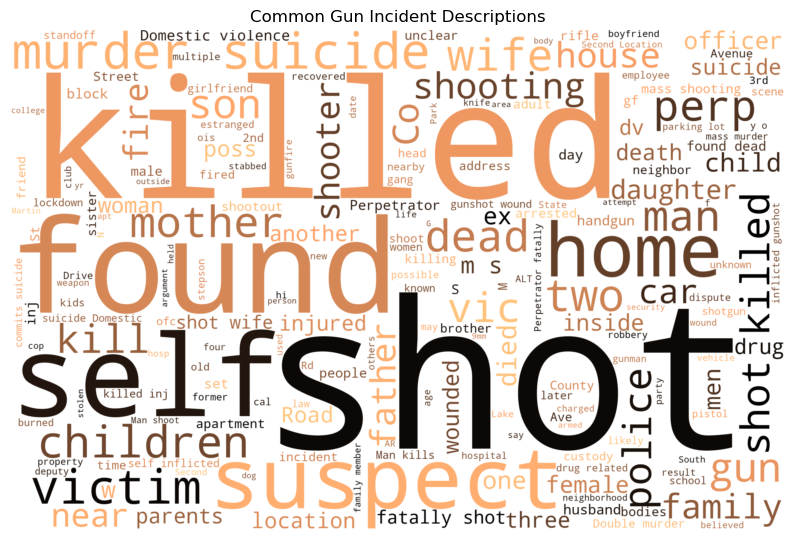

In [60]:
mask = np.array(Image.open('/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/gun.png'))
# Join text data from the 'location_description' column
txt = " ".join(mass_shootings_df['notes'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    mask=mask,
    max_words=200,
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'  # Use 'white' instead of 'White'
).generate(txt)

# Display the Word Cloud
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(wc, interpolation='bilinear')  # Use 'interpolation' for smoother rendering
plt.axis('off')
plt.title('Common Gun Incident Descriptions')
plt.show()

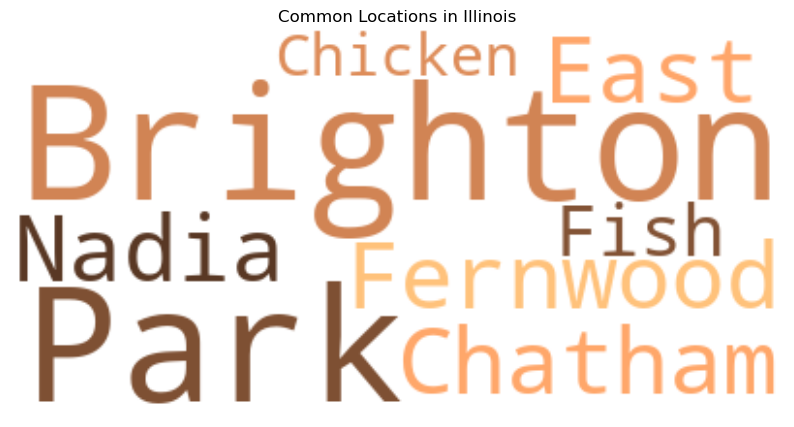

In [50]:
# Define the state you're interested in
target_state = "Illinois"

# Filter the data for incidents in the target state
incidents_in_target_state = mass_shootings_df[mass_shootings_df['state'] == target_state]

# Join text data from the 'location_description' column
txt = " ".join(incidents_in_target_state['location_description'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'
).generate(txt)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common Locations in {target_state}')
plt.show()

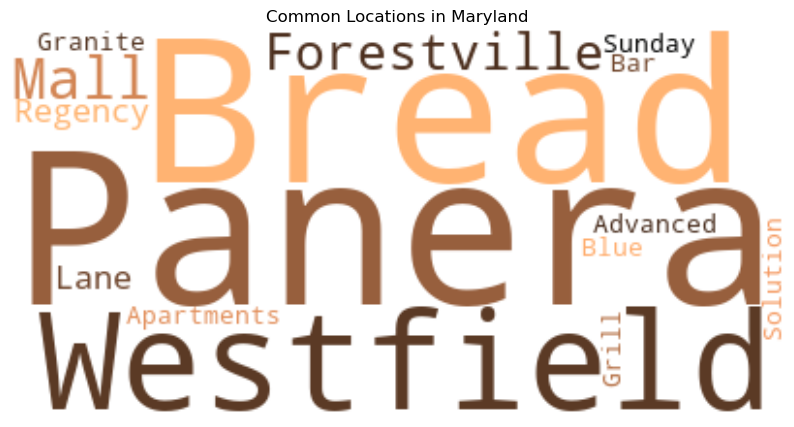

In [49]:
# Define the state you're interested in
target_state = "Maryland"

# Filter the data for incidents in the target state
incidents_in_target_state = mass_shootings_df[mass_shootings_df['state'] == target_state]

# Join text data from the 'location_description' column
txt = " ".join(incidents_in_target_state['location_description'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'
).generate(txt)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common Locations in {target_state}')
plt.show()

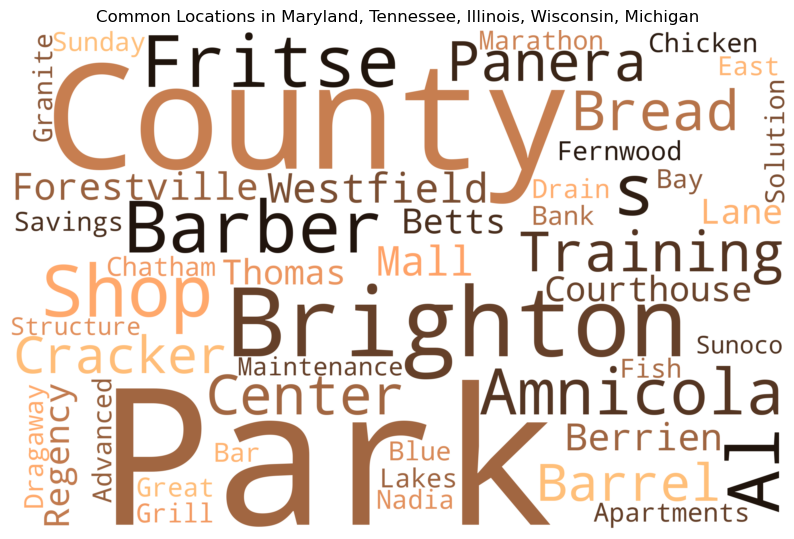

In [52]:
# Define the list of states you're interested in
target_states = ["Maryland", "Tennessee", "Illinois", "Wisconsin", "Michigan"]

# Concatenate location descriptions from all specified states
combined_text = " ".join(mass_shootings_df[mass_shootings_df['state'].isin(target_states)]['location_description'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    mask=mask,
    max_words=500,
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'
).generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common Locations in {", ".join(target_states)}')
plt.show()

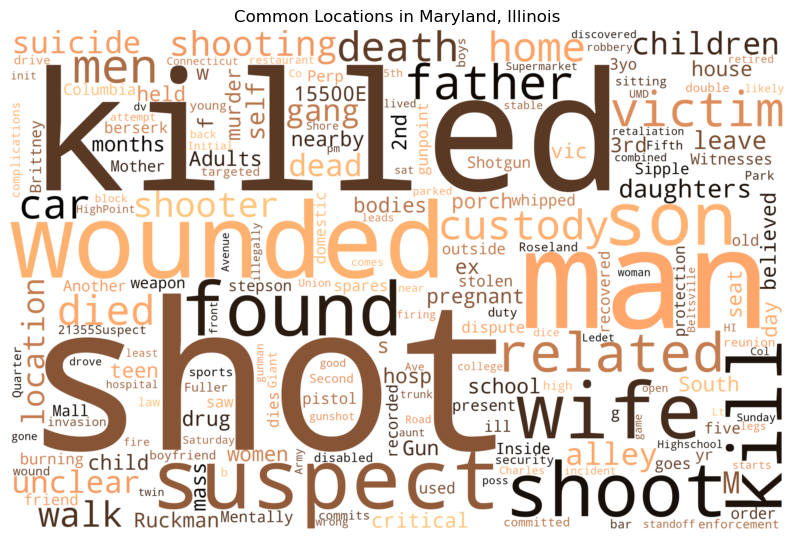

In [59]:
# Define the list of states you're interested in
target_states = ["Maryland", "Illinois"]

# Concatenate location descriptions from all specified states
combined_text = " ".join(mass_shootings_df[mass_shootings_df['state'].isin(target_states)]['notes'].dropna())

# Create WordCloud with the specified mask
wc = WordCloud(
    mask=mask,
    max_words=200,
    stopwords=STOPWORDS,
    colormap='copper',
    background_color='white'
).generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common Locations in {", ".join(target_states)}')
plt.show()